In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Conv2D , Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [2]:
#importing the dataset
data = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = data.load_data()
print("Shape of training set: ",x_train.shape)
print("Shape of test set: ",x_test.shape)
print("Shape of labels of training set: ",y_train.shape)
print("Shape of labels of test set: ",y_test.shape)

Shape of training set:  (50000, 32, 32, 3)
Shape of test set:  (10000, 32, 32, 3)
Shape of labels of training set:  (50000, 1)
Shape of labels of test set:  (10000, 1)


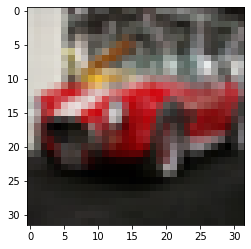

In [3]:
#visualising the picture
ran_no = random.randint(0,50000)
plt.imshow(x_train[ran_no])

In [4]:
#scaling the dataset
x_train,x_test = x_train/255, x_test/255

In [5]:
#flattening the test sets
y_train , y_test = y_train.flatten() , y_test.flatten()
print("Shape of labels of training set: ",y_train.shape)
print("Shape of labels of test set: ",y_test.shape)

Shape of labels of training set:  (50000,)
Shape of labels of test set:  (10000,)


In [6]:
#calculating the number of classes
k = len(set(y_train))
print("The number of classes are : ",k)

The number of classes are :  10


In [7]:
#creating the model
i = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),activation='relu',padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [8]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
#fitting the model
train = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3070 - accuracy: 0.5434 - val_loss: 1.1232 - val_accuracy: 0.6096
Epoch 2/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8553 - accuracy: 0.7002 - val_loss: 0.7900 - val_accuracy: 0.7226
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7044 - accuracy: 0.7568 - val_loss: 0.7143 - val_accuracy: 0.7518
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6033 - accuracy: 0.7914 - val_loss: 0.6756 - val_accuracy: 0.7686
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5176 - accuracy: 0.8217 - val_loss: 0.6428 - val_accuracy: 0.7866
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4454 - accuracy: 0.8444 - val_loss: 0.5917 - val_accuracy: 0.8028
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3906 - accuracy: 0.8636 - val_loss: 0.6142 - val_accuracy:

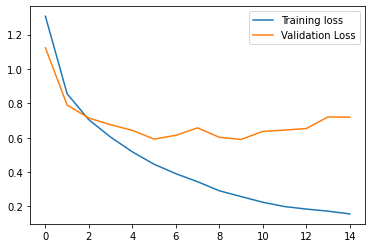

In [10]:
#loss over epochs 
plt.plot(train.history['loss'],label='Training loss')
plt.plot(train.history['val_loss'],label='Validation Loss')
plt.legend()

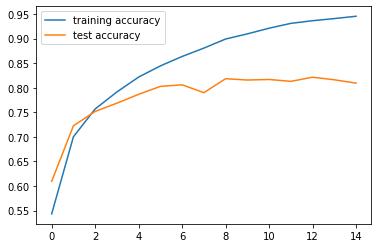

In [11]:
#accuracy
plt.plot(train.history['accuracy'],label='training accuracy')
plt.plot(train.history['val_accuracy'],label='test accuracy')
plt.legend()

In [12]:
#augmenting data
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,32)
steps_per_epoch1 = x_train.shape[0]//32
train = model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch1,epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6079 - accuracy: 0.7984 - val_loss: 0.5920 - val_accuracy: 0.8053
Epoch 2/15
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5200 - accuracy: 0.8241 - val_loss: 0.5151 - val_accuracy: 0.8233
Epoch 3/15
1562/1562 [==============================] - 26s 17ms/step - loss: 0.4832 - accuracy: 0.8358 - val_loss: 0.5816 - val_accuracy: 0.8037
Epoch 4/15
1562/1562 [==============================] - 26s 17ms/step - loss: 0.4654 - accuracy: 0.8417 - val_loss: 0.5126 - val_accuracy: 0.8240
Epoch 5/15
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4413 - accuracy: 0.8487 - val_loss: 0.4726 - val_accuracy: 0.8420
Epoch 6/15
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4284 - accuracy: 0.8525 - val_loss: 0.5864 - val_accuracy: 0.8029
Epoch 7/15
1562/1562 [==========================

In [19]:
#saving the model
model.save('imagerecogmodel.h5')

In [15]:
labels = "Airplane Automobile Bird Cat Deer Dog Frog Horse Ship Truck".split()

this is an image of :  Truck


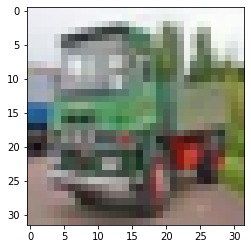

In [18]:
#predicting random images
ran_no = random.randint(0,10000)
y_pred = model.predict(x_test[ran_no].reshape(1,32,32,3))
y_pred = y_pred.argmax()
plt.imshow(x_test[ran_no])
y_pred = labels[y_pred]
print("this is an image of : ",y_pred)